In [ ]:
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd

In [94]:
aq_df = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')

In [95]:
aq_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [7]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
aq_df_ = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)


In [115]:
aq_df = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv',
                    parse_dates=[['year', 'month', 'day', 'hour']], 
                    date_parser = lambda x: datetime.strptime(x, '%Y %m %d %H'),
                    keep_date_col=True
                   )

C:\Users\Abhishek Murthy\AppData\Local\Temp\ipykernel_29488\3541401187.py:1: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



In [105]:
aq_df.head(10)

year_month_day_hour  No  year month day hour  PM2.5  PM10  SO2  NO2     CO  \
0 2013-03-01 00:00:00   1  2013     3   1    0    4.0   4.0  3.0  NaN  200.0   
1 2013-03-01 01:00:00   2  2013     3   1    1    7.0   7.0  3.0  NaN  200.0   
2 2013-03-01 02:00:00   3  2013     3   1    2    5.0   5.0  3.0  2.0  200.0   
3 2013-03-01 03:00:00   4  2013     3   1    3    6.0   6.0  3.0  NaN  200.0   
4 2013-03-01 04:00:00   5  2013     3   1    4    5.0   5.0  3.0  NaN  200.0   
5 2013-03-01 05:00:00   6  2013     3   1    5    6.0   6.0  3.0  4.0  200.0   
6 2013-03-01 06:00:00   7  2013     3   1    6    5.0  10.0  3.0  4.0  200.0   
7 2013-03-01 07:00:00   8  2013     3   1    7    5.0   6.0  3.0  2.0  200.0   
8 2013-03-01 08:00:00   9  2013     3   1    8    8.0   7.0  3.0  3.0  200.0   
9 2013-03-01 09:00:00  10  2013     3   1    9    8.0   8.0  3.0  2.0  200.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling  
5  79.0  -4.5  1022.6 -19.5   0.0  NNW   1.7  Dingling  
6  77.0  -4.5  1023.4 -19.5   0.0  NNW   1.8  Dingling  
7  80.0  -2.1  1024.6 -20.0   0.0   NW   2.5  Dingling  
8  79.0  -0.2  1025.2 -20.5   0.0  NNW   2.8  Dingling  
9  81.0   0.6  1025.3 -20.4   0.0  NNW   3.8  Dingling

In [106]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [107]:
aq_df.isnull().any()

year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

In [108]:
aq_df.nunique()

year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                    486
PM10                     554
SO2                      327
NO2                      636
CO                       103
O3                       792
TEMP                     998
PRES                     593
DEWP                     602
RAIN                     116
wd                        16
WSPM                      95
station                    1
dtype: int64

In [116]:

import plotly.express as px
from plotly.subplots import make_subplots

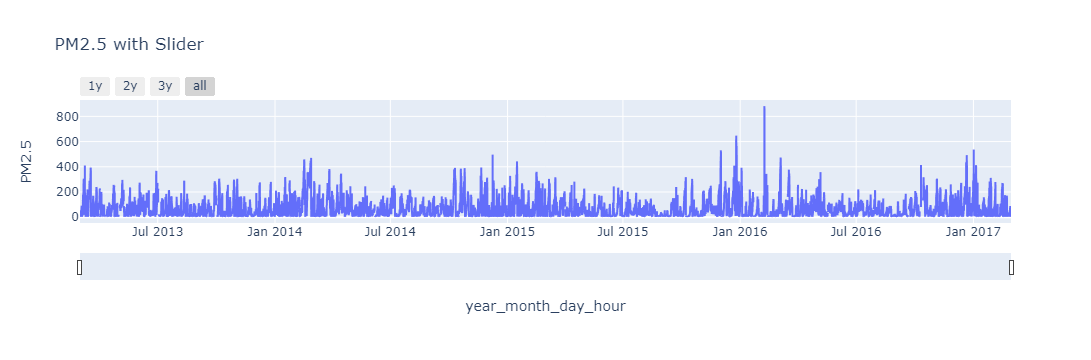

In [117]:
import plotly.express as px
fig = px.line(aq_df,
             x = 'year_month_day_hour',
             y='PM2.5',
             title='PM2.5 with Slider')


fig.update_xaxes(
                 rangeslider_visible=True,
                 rangeselector=dict(
                             buttons = list(
                             [dict(count=1, label='1y', step='year', stepmode='backward'),
                              dict(count=2, label='2y', step='year', stepmode='backward'),
                              dict(count=3, label='3y', step='year', stepmode='backward'),
                              dict(step='all')
                             ])))
fig.show()

fig.write_html("PM25_slider.html")

In [118]:
aq_df = aq_df.set_index('year_month_day_hour')

In [119]:
aq_df.head()

No  year month day hour  PM2.5  PM10  SO2  NO2     CO  \
year_month_day_hour                                                          
2013-03-01 00:00:00   1  2013     3   1    0    4.0   4.0  3.0  NaN  200.0   
2013-03-01 01:00:00   2  2013     3   1    1    7.0   7.0  3.0  NaN  200.0   
2013-03-01 02:00:00   3  2013     3   1    2    5.0   5.0  3.0  2.0  200.0   
2013-03-01 03:00:00   4  2013     3   1    3    6.0   6.0  3.0  NaN  200.0   
2013-03-01 04:00:00   5  2013     3   1    4    5.0   5.0  3.0  NaN  200.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                       
2013-03-01 00:00:00  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2013-03-01 02:00:00  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 03:00:00  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
2013-03-01 04:00:00  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [23]:
aq_df['2013-03-01':'2013-03-05']

No  year month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                       
2013-03-01 00:00:00    1  2013     3   1    0    4.0    4.0   3.0   NaN   
2013-03-01 01:00:00    2  2013     3   1    1    7.0    7.0   3.0   NaN   
2013-03-01 02:00:00    3  2013     3   1    2    5.0    5.0   3.0   2.0   
2013-03-01 03:00:00    4  2013     3   1    3    6.0    6.0   3.0   NaN   
2013-03-01 04:00:00    5  2013     3   1    4    5.0    5.0   3.0   NaN   
...                  ...   ...   ...  ..  ...    ...    ...   ...   ...   
2013-03-05 19:00:00  116  2013     3   5   19  179.0  200.0  50.0  96.0   
2013-03-05 20:00:00  117  2013     3   5   20  172.0  180.0  43.0  94.0   
2013-03-05 21:00:00  118  2013     3   5   21  179.0  191.0  38.0  80.0   
2013-03-05 22:00:00  119  2013     3   5   22  173.0  168.0  39.0  73.0   
2013-03-05 23:00:00  120  2013     3   5   23  170.0  162.0  42.0  72.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00   200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00   200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00   200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00   200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2013-03-05 19:00:00  1600.0  82.0   7.7  1005.4  -7.6   0.0  NNE   0.2   
2013-03-05 20:00:00  1899.0  82.0   6.3  1005.9  -7.3   0.0  NNE   0.7   
2013-03-05 21:00:00  1700.0  82.0   5.6  1006.0  -7.3   0.0  NNE   0.2   
2013-03-05 22:00:00  1800.0  82.0   4.9  1005.8  -7.0   0.0    N   1.7   
2013-03-05 23:00:00  1700.0  82.0   3.7  1005.7  -6.9   0.0   NE   0.4   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2013-03-05 19:00:00  Dingling  
2013-03-05 20:00:00  Dingling  
2013-03-05 21:00:00  Dingling  
2013-03-05 22:00:00  Dingling  
2013-03-05 23:00:00  Dingling  

[120 rows x 18 columns]

In [120]:
aq_df['2013':'2015']

No  year month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                         
2013-03-01 00:00:00      1  2013     3   1    0    4.0    4.0   3.0   NaN   
2013-03-01 01:00:00      2  2013     3   1    1    7.0    7.0   3.0   NaN   
2013-03-01 02:00:00      3  2013     3   1    2    5.0    5.0   3.0   2.0   
2013-03-01 03:00:00      4  2013     3   1    3    6.0    6.0   3.0   NaN   
2013-03-01 04:00:00      5  2013     3   1    4    5.0    5.0   3.0   NaN   
...                    ...   ...   ...  ..  ...    ...    ...   ...   ...   
2015-12-31 19:00:00  24860  2015    12  31   19   85.0   95.0  12.0  73.0   
2015-12-31 20:00:00  24861  2015    12  31   20    NaN  109.0  32.0  79.0   
2015-12-31 21:00:00  24862  2015    12  31   21   80.0  100.0  35.0  81.0   
2015-12-31 22:00:00  24863  2015    12  31   22   93.0   93.0  28.0  76.0   
2015-12-31 23:00:00  24864  2015    12  31   23   98.0   98.0  25.0  75.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00   200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00   200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00   200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00   200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2015-12-31 19:00:00  1200.0   2.0  -0.6  1021.0  -9.5   0.0   NE   0.6   
2015-12-31 20:00:00  2900.0   2.0  -1.8  1021.2  -9.9   0.0   NW   1.1   
2015-12-31 21:00:00  3200.0   2.0  -1.6  1020.8  -9.7   0.0   NE   0.9   
2015-12-31 22:00:00  3500.0   2.0  -2.9  1020.4  -9.8   0.0  NNW   1.3   
2015-12-31 23:00:00  3600.0   2.0  -3.5  1020.2  -9.7   0.0  NNW   1.3   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2015-12-31 19:00:00  Dingling  
2015-12-31 20:00:00  Dingling  
2015-12-31 21:00:00  Dingling  
2015-12-31 22:00:00  Dingling  
2015-12-31 23:00:00  Dingling  

[24864 rows x 18 columns]

In [25]:
pm_data = aq_df['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

<Axes: xlabel='year_month_day_hour'>

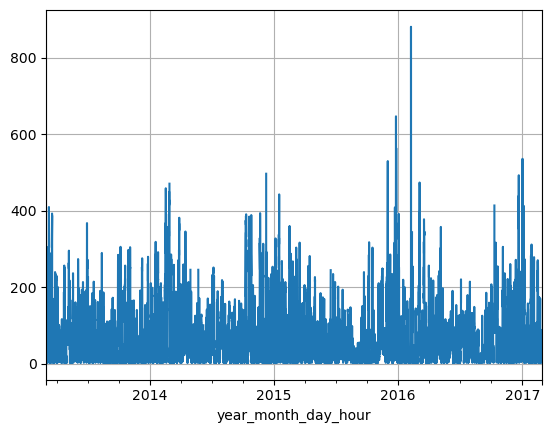

In [26]:
pm_data.plot(grid=True)

In [83]:
pm_data_2015 = pm_data.loc['2015']

<Axes: xlabel='year_month_day_hour'>

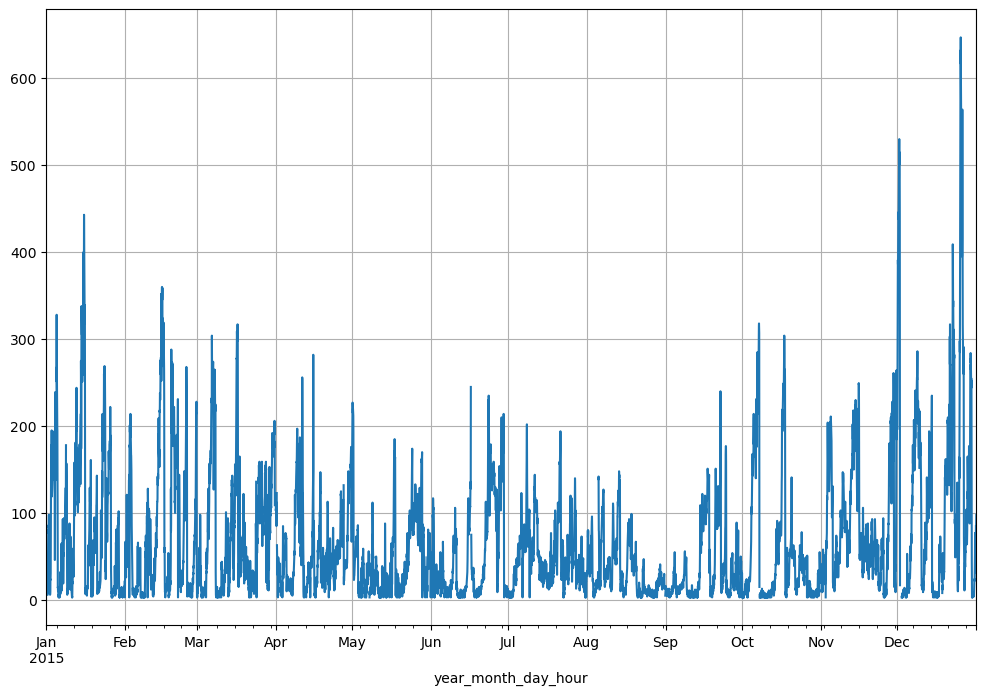

In [85]:
pm_data_2015.plot(grid=True, figsize=(12, 8))


In [33]:
groups = aq_df['2014':'2016'][['month', 'PM2.5']].groupby('month')

In [39]:
mos = {}
for name, group in groups:
    #print(name)
    mos[name] = group.values
#mos.boxplot()
#pyplot.show()

<Axes: title={'center': 'O3'}, xlabel='[month]'>

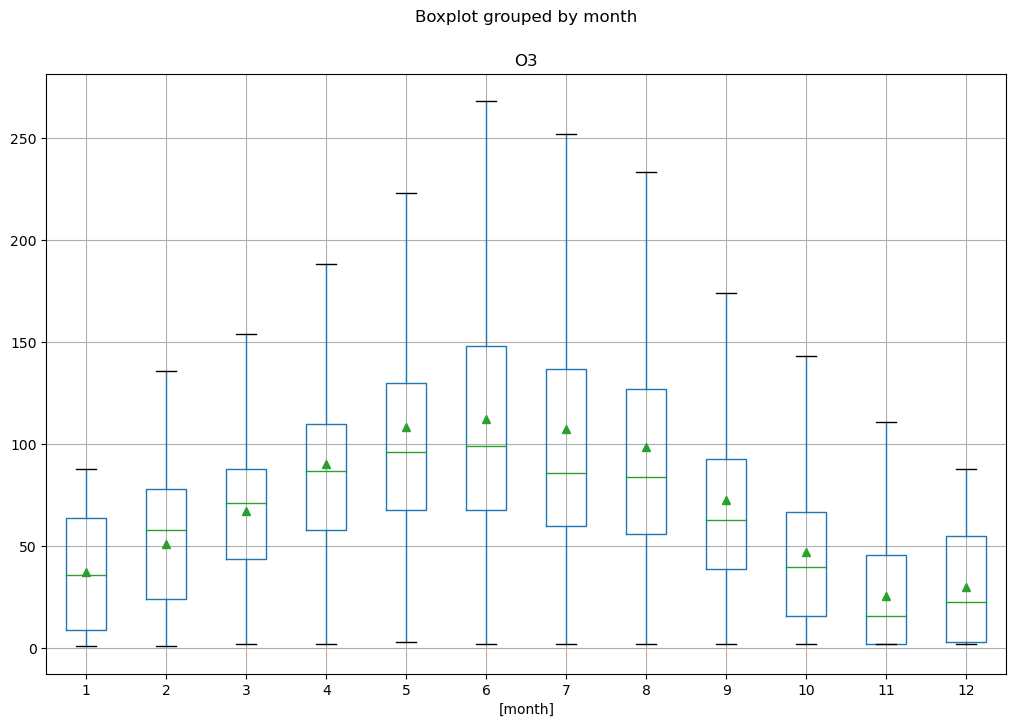

In [140]:
aq_df['2014':'2016'][['month', 'O3']].boxplot(by='month',
                                                 showfliers=False,
                                                 showmeans=True,
                                                 positions=[1, 10, 11, 12, 2, 3,4, 5, 6, 7,8, 9],
                                                 figsize=(12, 8))

<Axes: title={'center': 'O3'}, xlabel='[month]'>

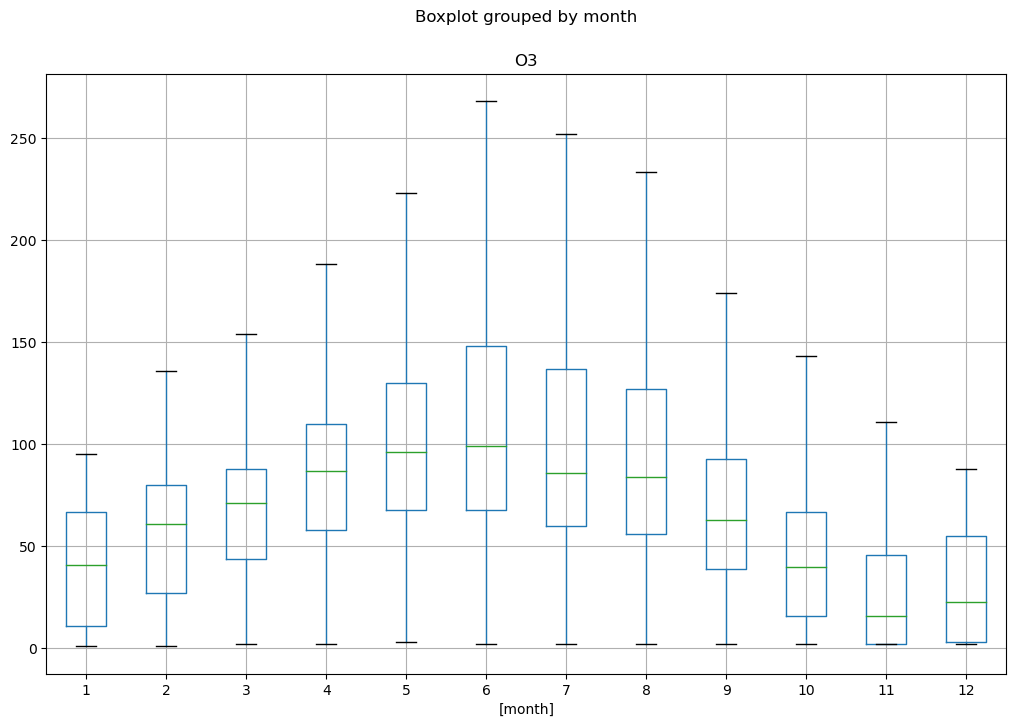

In [136]:
aq_df.loc['2014':'2017'][['month', 'O3']].boxplot(by='month', showfliers=False, positions=[1, 10, 11, 12, 2, 3,4, 5, 6, 7,8, 9], figsize=(12, 8))

Text(0, 0.5, 'PM2.5')

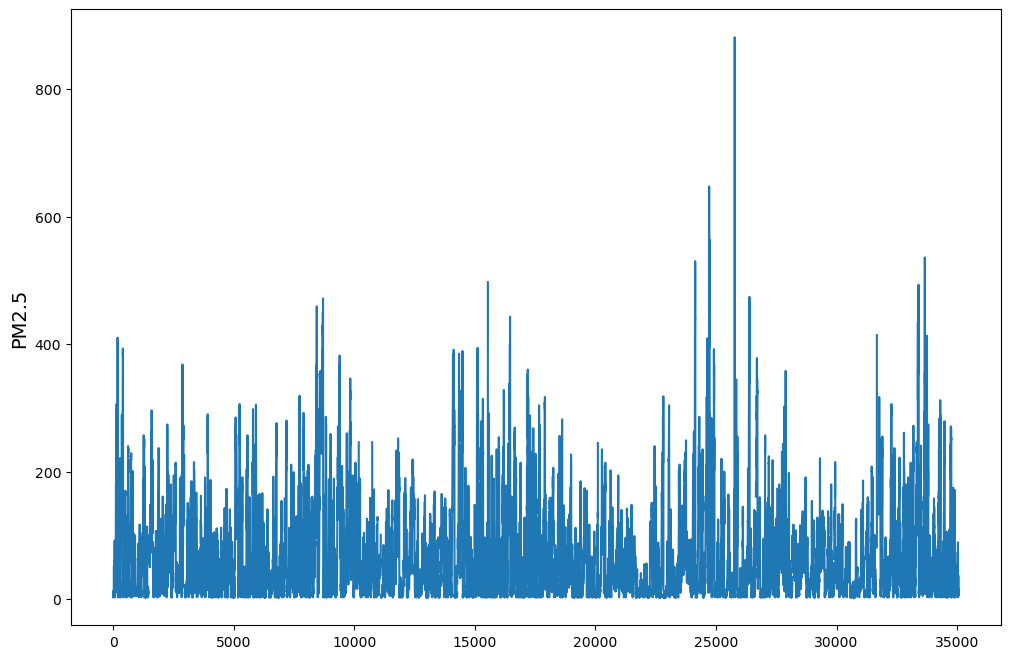

In [112]:
aq_df['PM2.5'].plot(figsize=(12, 8))
plt.ylabel('PM2.5', fontsize=14)

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

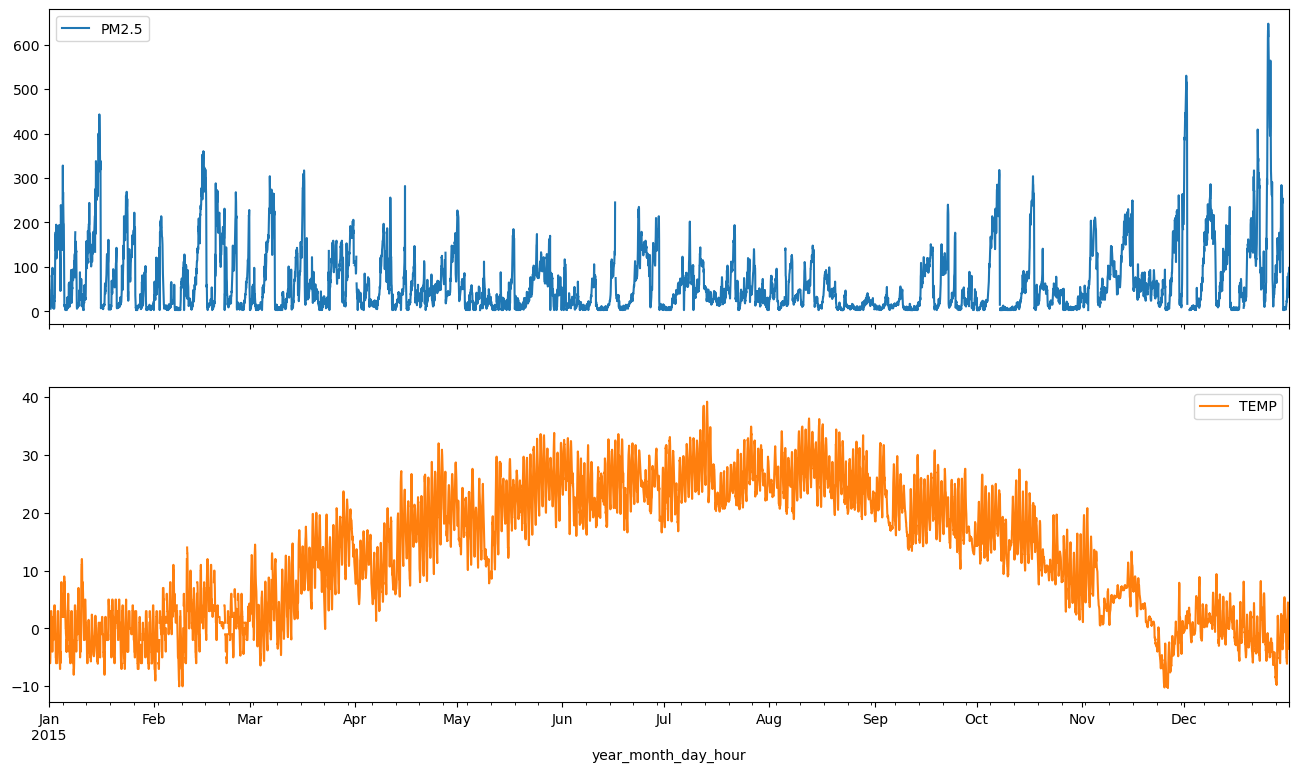

In [77]:
aq_df.loc['2015'][['PM2.5', 'TEMP']].plot(subplots=True, figsize=(16, 9))#.plot(subplots='True')

In [55]:
mos['1']

array([['1', 27.0],
       ['1', 25.0],
       ['1', 27.0],
       ...,
       ['1', 10.0],
       ['1', 13.0],
       ['1', 4.0]], dtype=object)

In [73]:
multi_data = aq_df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5']]

array([<Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>,
       <Axes: xlabel='year_month_day_hour'>], dtype=object)

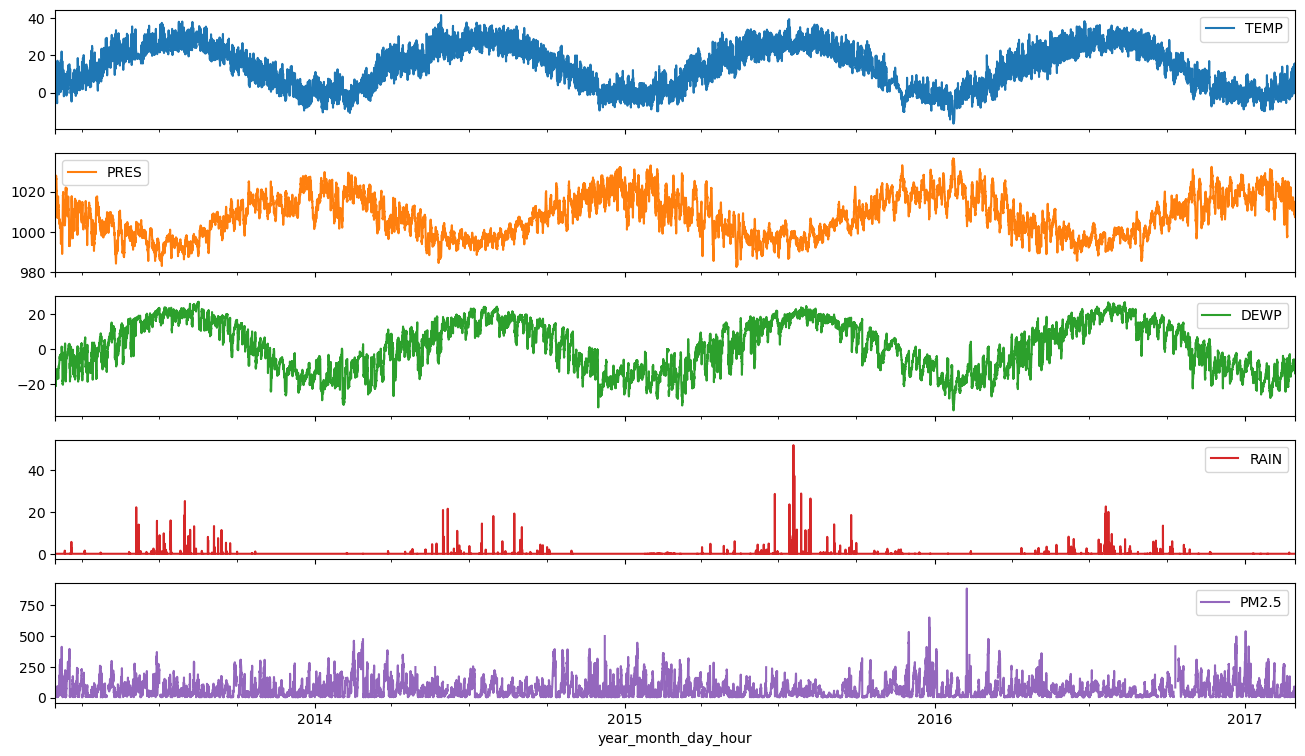

In [76]:
multi_data.plot(subplots=True, figsize=(16, 9))

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



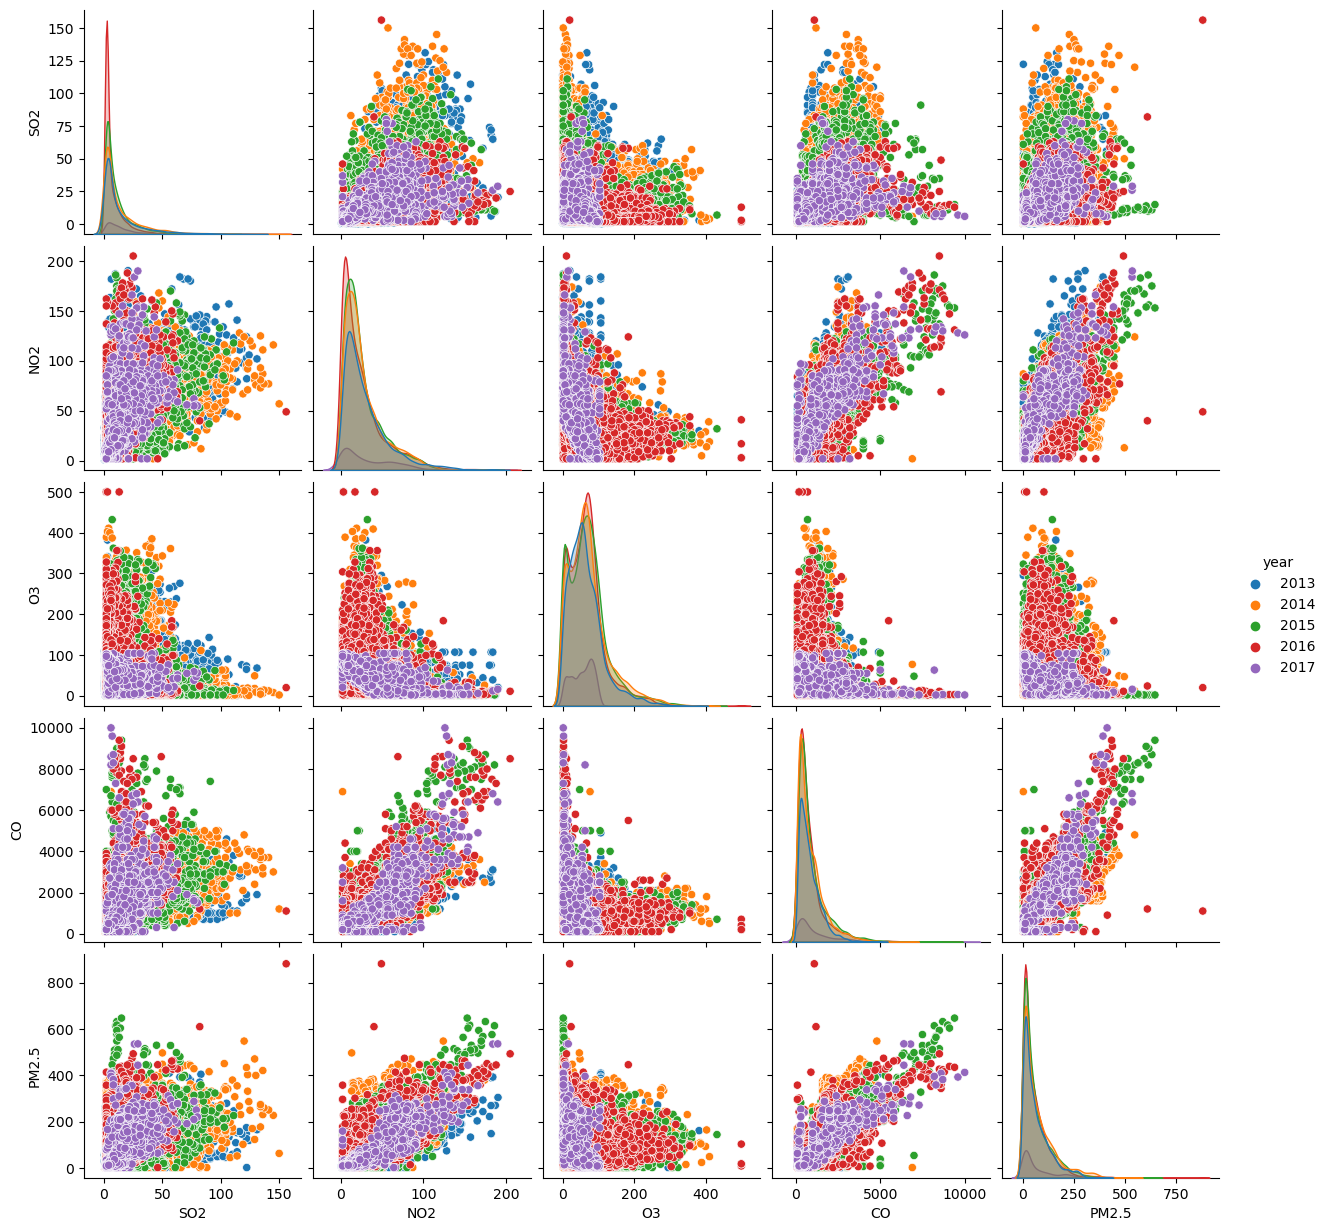

In [129]:
g = sns.pairplot(aq_df[['SO2', 'NO2', 'O3', 'CO', 'PM2.5', 'year']], hue='year')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

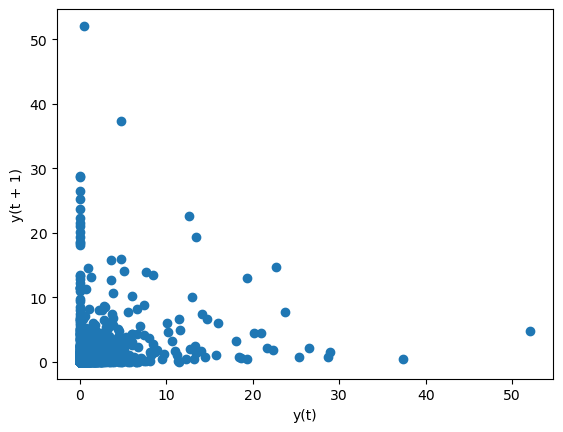

In [152]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=)
